In [15]:
import pandas as pd
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font =FontProperties(fname='C:\\Users\\xiangfu.meng\\AppData\\Local\\miniforge3\\envs\\python3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\SimHei.ttf', size=14)

# GII

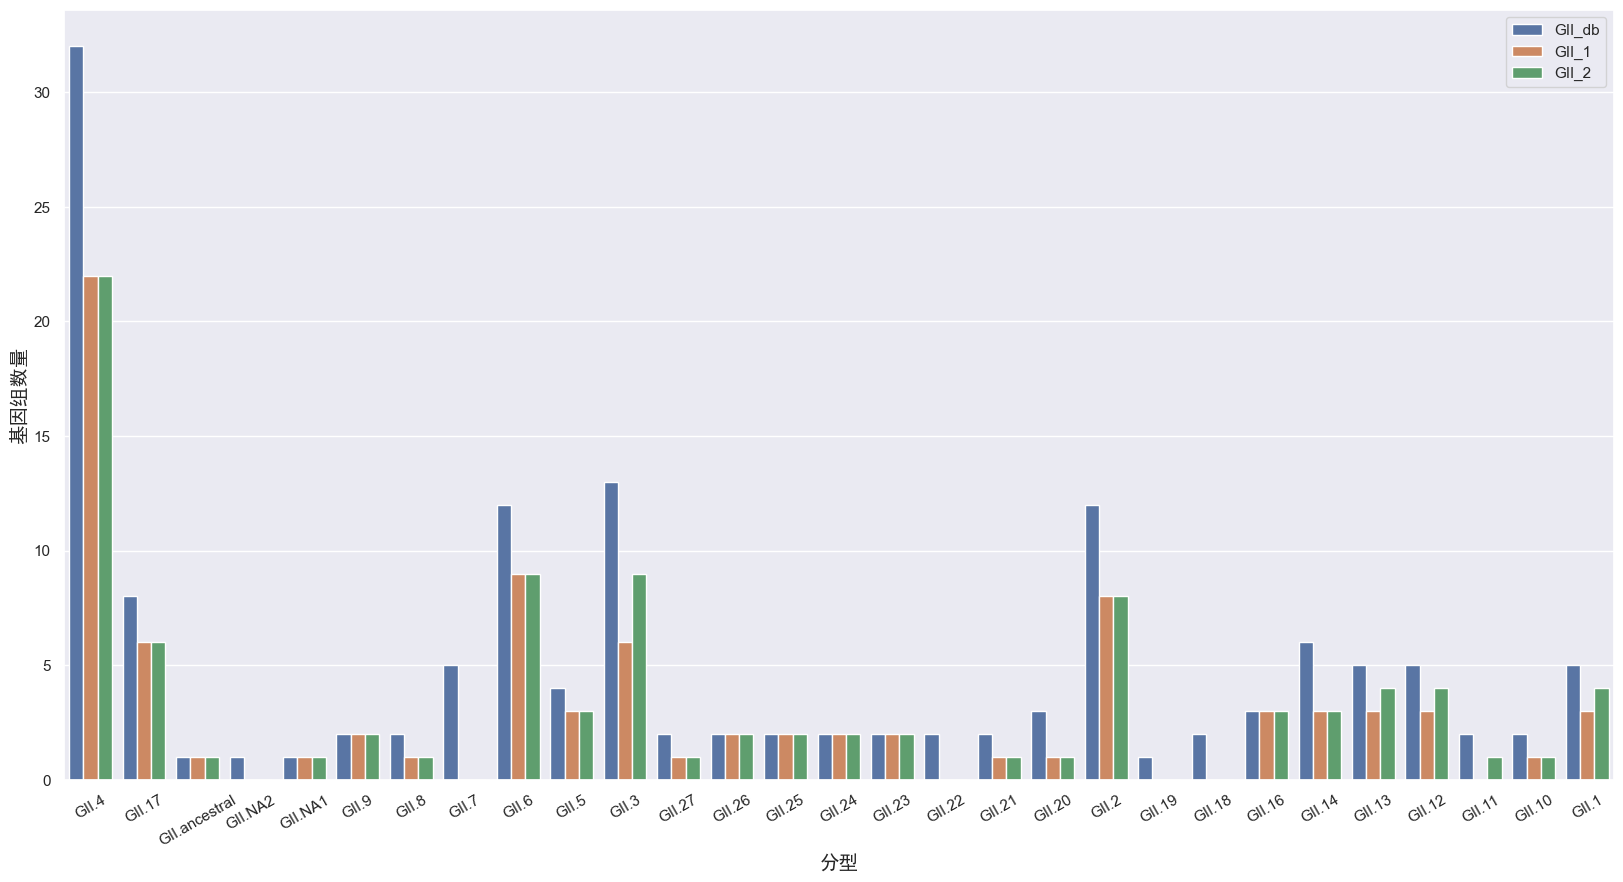

In [30]:
#优势分型
GII_main_types = ['GII.4', 'GII.17']

# GII 引物1
df = pd.read_csv('./NV_GII_1.bed', sep='_', usecols=[0], header=None)
type_count_series = df[[0]].value_counts()
type_count_series.index = [tp[0] for tp in type_count_series.index.tolist()]
type_count_series.name = 'GII_1'

# 引物2
df = pd.read_csv('./NV_GII_2.bed', sep='_', usecols=[0], header=None)
type_count_series2 = df[[0]].value_counts()
type_count_series2.index = [tp[0] for tp in type_count_series2.index.tolist()]
type_count_series2.name = 'GII_2'

# GII 数据库
db_type_count_series = pd.Series()
db_type_count_series.name = 'GII_db'
with open('norovirus-GII.fasta.header') as f:
    for line in f:
        type_name = line.replace('>','').split('_')[0]
        if type_name not in db_type_count_series.index:
            db_type_count_series[type_name] = 1
        else:
            db_type_count_series[type_name] += 1

# 合并            
dfm = pd.concat([db_type_count_series, type_count_series, type_count_series2], axis=1).fillna(0)
dfm['GII_1'] = dfm['GII_1'].astype(int)
dfm['GII_2'] = dfm['GII_2'].astype(int)
dfm['Type'] = dfm.index

# 优势物种靠前展示
dfm['priority'] = dfm['Type'].apply(lambda x:1 if x in GII_main_types else 2)
df_sorted_priority = dfm.sort_values(by=['priority', 'Type'], ascending=[True, False])
df_sorted_priority = df_sorted_priority.drop(columns=['priority'])
df_GII_out = df_sorted_priority[['Type'] + df_sorted_priority.columns[:3].tolist()]

# 转长格式
df_long = df_sorted_priority.melt(id_vars='Type', var_name='Primer', value_name='Value')

# set plot style: grey grid in the background:
sns.set_theme(style="darkgrid")

# load dataset
tips = sns.load_dataset("tips")

# Set the figure size
plt.figure(figsize=(20, 10))

# grouped barplot
sns.barplot(x="Type", y="Value", hue="Primer", data=df_long, errorbar=None)

plt.xticks(rotation=30)
plt.xlabel("分型", fontproperties=font)
plt.ylabel('基因组数量', fontproperties=font)
plt.legend(title=None)

plt.savefig('GII.png', dpi=300)

# GI

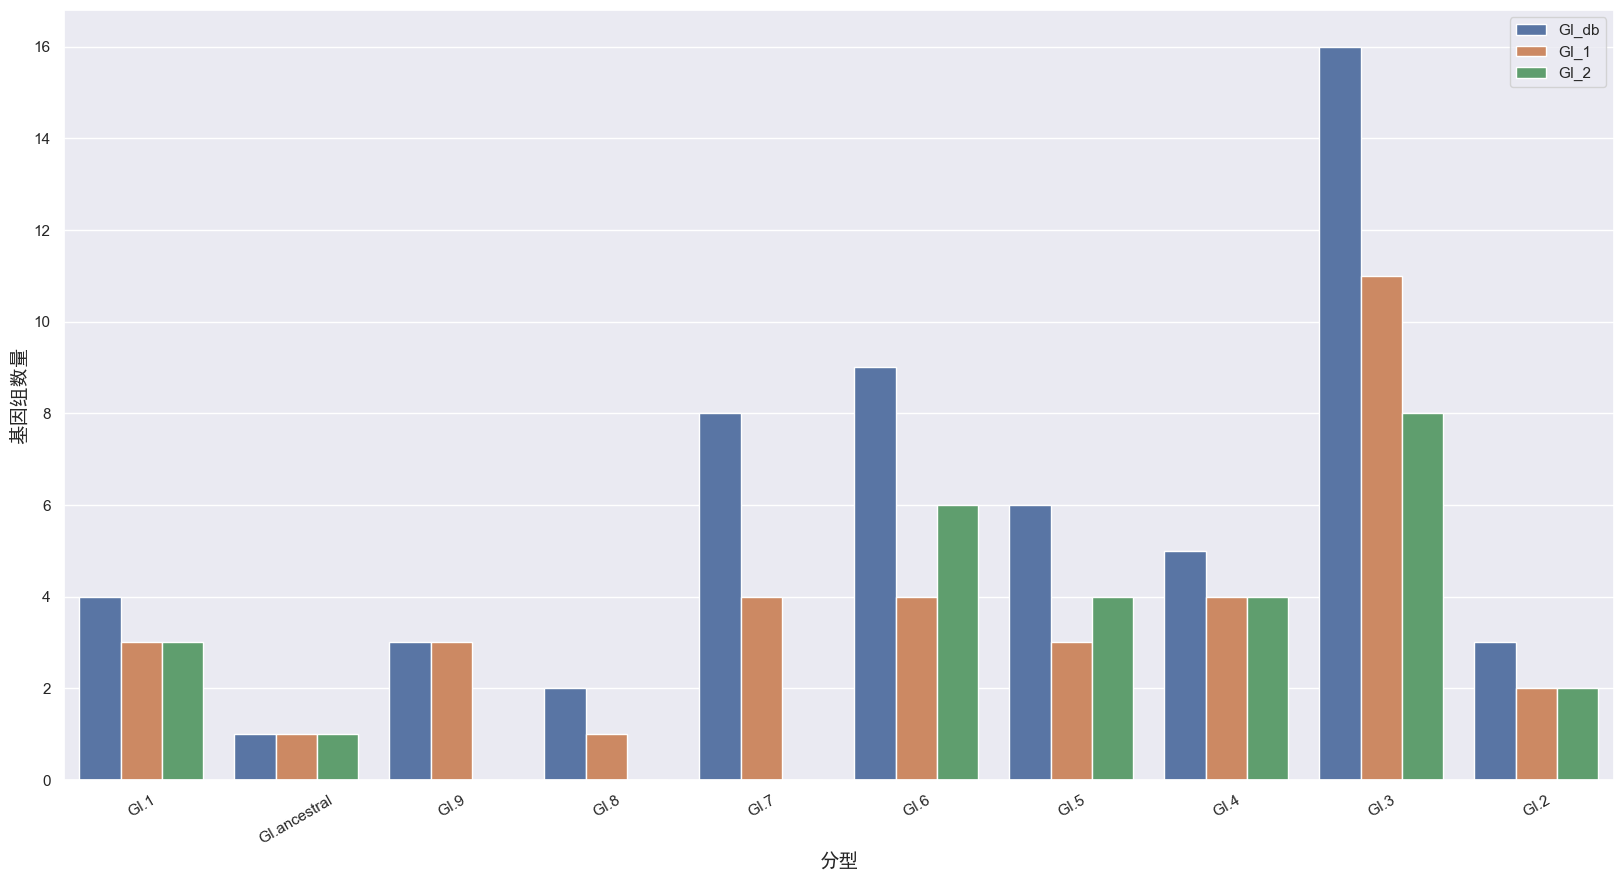

In [29]:
#优势分型
GI_main_types = ['GI.1']

# GI 引物1
df = pd.read_csv('./NV_GI_1.bed', sep='_', usecols=[0], header=None)
type_count_series = df[[0]].value_counts()
type_count_series.index = [tp[0] for tp in type_count_series.index.tolist()]
type_count_series.name = 'GI_1'

# 引物2
df = pd.read_csv('./NV_GI_2.bed', sep='_', usecols=[0], header=None)
type_count_series2 = df[[0]].value_counts()
type_count_series2.index = [tp[0] for tp in type_count_series2.index.tolist()]
type_count_series2.name = 'GI_2'

# GI 数据库
db_type_count_series = pd.Series()
db_type_count_series.name = 'GI_db'
with open('norovirus-GI.fasta.header') as f:
    for line in f:
        type_name = line.replace('>','').split('_')[0]
        if type_name not in db_type_count_series.index:
            db_type_count_series[type_name] = 1
        else:
            db_type_count_series[type_name] += 1

# 合并            
dfm = pd.concat([db_type_count_series, type_count_series, type_count_series2], axis=1).fillna(0)
dfm['GI_1'] = dfm['GI_1'].astype(int)
dfm['GI_2'] = dfm['GI_2'].astype(int)
dfm['Type'] = dfm.index

# 优势物种靠前展示
dfm['priority'] = dfm['Type'].apply(lambda x:1 if x in GI_main_types else 2)
df_sorted_priority = dfm.sort_values(by=['priority', 'Type'], ascending=[True, False])
df_sorted_priority = df_sorted_priority.drop(columns=['priority'])
# df_GI_out = df_sorted_priority
df_GI_out = df_sorted_priority[['Type'] + df_sorted_priority.columns[:3].tolist()]

# 转长格式
df_long = df_sorted_priority.melt(id_vars='Type', var_name='Primer', value_name='Value')

# set plot style: grey grid in the background:
sns.set_theme(style="darkgrid")

# load dataset
tips = sns.load_dataset("tips")

# Set the figure size
plt.figure(figsize=(20, 10))

# grouped barplot
sns.barplot(x="Type", y="Value", hue="Primer", data=df_long, errorbar=None)

plt.xticks(rotation=30)
plt.xlabel("分型", fontproperties=font)
plt.ylabel('基因组数量', fontproperties=font)
plt.legend(title=None)

plt.savefig('GI.png', dpi=300)

In [31]:
with pd.ExcelWriter('引物包容性评估_240722.xlsx', engine='openpyxl') as writer:
    df_GI_out.to_excel(writer, index=False, sheet_name='GI')
    df_GII_out.to_excel(writer, index=False, sheet_name='GII')